# Can you predict the Home Team Margin of Victory In NBA Regular Season

I wanted to predict the Home Team Margin of Victory in the NBA based on statistics compiled from stats.NBA.com. The NBA is a professional basketball league which has an 82 game regular season. My dataset was based on the 2016 which means there were 1230 games in the sample. 

### Import Libraries that you need

In [3]:
import requests
import json
import pandas as pd
import sys
reload(sys)
sys.setdefaultencoding('utf8')

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Boxscore Data

In [87]:
games= []
# for i in range(1,10):
#     games.append('002150000' + str(i))
# for i in range(10,100):
#     games.append('00215000' + str(i))
# for i in range(100,300):
#     games.append('0021500' + str(i))
# for i in range(300,500):
#     games.append('0021500' + str(i))
# for i in range(500,700):
#     games.append('0021500' + str(i))
# for i in range(700,1000):
#     games.append('0021500' + str(i))    
for i in range(1000,1231):
    games.append('002150' + str(i))
# # for i in range(100,1000):
# #     games.append('0021500' + str(i))
# # for i in range(1000,1231):
# #     games.append('002150' + str(i))
    
games

In [375]:
frames=[]

def extract_boxscore(games):
    for game in games:
        print game
        response = requests.get('http://stats.nba.com/stats/boxscoresummaryv2?GameID=' + game, headers={"user-agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.92 Safari/537.36"})
        resultSets =  response.json()['resultSets']

        for result in resultSets:

            if result['name'] == 'LineScore':
                headers = result['headers']
                shot_data = result['rowSet']
                df = pd.DataFrame(shot_data,columns=headers) 
                frames.append(df)
            
    return frames

list_df = extract_boxscore(games)
result = pd.concat(frames)
result.head()


In [77]:
result.tail()

,GAME_DATE_EST,GAME_SEQUENCE,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY_NAME,TEAM_NICKNAME,TEAM_WINS_LOSSES,PTS_QTR1,PTS_QTR2,...,PTS_OT2,PTS_OT3,PTS_OT4,PTS_OT5,PTS_OT6,PTS_OT7,PTS_OT8,PTS_OT9,PTS_OT10,PTS
1,2016-04-13T00:00:00,12,0021501228,1610612762,UTA,Utah,Jazz,40-42,21,36,...,0,0,0,0,0,0,0,0,0,96
0,2016-04-13T00:00:00,13,0021501229,1610612756,PHX,Phoenix,Suns,23-59,25,37,...,0,0,0,0,0,0,0,0,0,114
1,2016-04-13T00:00:00,13,0021501229,1610612746,LAC,LA,Clippers,53-29,27,28,...,0,0,0,0,0,0,0,0,0,105
0,2016-04-13T00:00:00,14,0021501230,1610612757,POR,Portland,Trail Blazers,44-38,27,31,...,0,0,0,0,0,0,0,0,0,107
1,2016-04-13T00:00:00,14,0021501230,1610612743,DEN,Denver,Nuggets,33-49,31,25,...,0,0,0,0,0,0,0,0,0,99


In [78]:
# records_one_to_hundred = result

# records_hundred_to_five_hundred = result

# records_five_hundred_to_one_thousand = result

records_one_thousand_to_one_thousand_1230 = result


In [80]:
final = pd.concat([records_one_to_hundred,records_hundred_to_five_hundred,records_five_hundred_to_one_thousand,records_one_thousand_to_one_thousand_1230])

In [81]:
final.to_csv('boxscore.csv')

In [134]:
boxscore = pd.read_csv('boxscore.csv')

In [135]:
boxscore.drop(['PTS_OT5','PTS_OT6','PTS_OT7','PTS_OT8','PTS_OT9','PTS_OT10'], axis=1, inplace=True)

In [136]:
boxscore.drop('Unnamed: 0', inplace=True, axis=1)

In [173]:
merged_boxscores.to_csv('merged_boxscores.csv')

In [226]:
scores = pd.read_csv('merged_boxscores.csv')

In [227]:
scores.drop('Unnamed: 0',axis=1, inplace=True)

In [228]:
scores.columns

Index([u'GAME_DATE_EST_x', u'GAME_SEQUENCE_x', u'GAME_ID', u'TEAM_ID_x',
       u'TEAM_ABBREVIATION_x', u'TEAM_CITY_NAME_x', u'TEAM_NICKNAME_x',
       u'TEAM_WINS_LOSSES_x', u'PTS_QTR1_x', u'PTS_QTR2_x', u'PTS_QTR3_x',
       u'PTS_QTR4_x', u'PTS_OT1_x', u'PTS_OT2_x', u'PTS_OT3_x', u'PTS_OT4_x',
       u'PTS_x', u'GAME_DATE_EST_y', u'GAME_SEQUENCE_y', u'TEAM_ID_y',
       u'TEAM_ABBREVIATION_y', u'TEAM_CITY_NAME_y', u'TEAM_NICKNAME_y',
       u'TEAM_WINS_LOSSES_y', u'PTS_QTR1_y', u'PTS_QTR2_y', u'PTS_QTR3_y',
       u'PTS_QTR4_y', u'PTS_OT1_y', u'PTS_OT2_y', u'PTS_OT3_y', u'PTS_OT4_y',
       u'PTS_y'],
      dtype='object')

In [232]:
scores = scores[[0,2,3,4,7,8,9,10,11,12,13,14,15,16,19,20,23,24,25,26,27,28,29,30,31,32]]

In [233]:
scores.columns

Index([u'GAME_DATE_EST_x', u'GAME_ID', u'TEAM_ID_x', u'TEAM_ABBREVIATION_x',
       u'TEAM_WINS_LOSSES_x', u'PTS_QTR1_x', u'PTS_QTR2_x', u'PTS_QTR3_x',
       u'PTS_QTR4_x', u'PTS_OT1_x', u'PTS_OT2_x', u'PTS_OT3_x', u'PTS_OT4_x',
       u'PTS_x', u'TEAM_ID_y', u'TEAM_ABBREVIATION_y', u'TEAM_WINS_LOSSES_y',
       u'PTS_QTR1_y', u'PTS_QTR2_y', u'PTS_QTR3_y', u'PTS_QTR4_y',
       u'PTS_OT1_y', u'PTS_OT2_y', u'PTS_OT3_y', u'PTS_OT4_y', u'PTS_y'],
      dtype='object')

In [240]:
scores.rename(columns={'GAME_DATE_EST_x':'DATE',
                       'TEAM_ID_x':'HOME_TEAM_ID',
                       'TEAM_ABBREVIATION_x':'HOME_TEAM',
                       'TEAM_WINS_LOSSES_x': 'HOME_TEAM_W_L', 
                       'PTS_QTR1_x':'HOME_QTR1', 
                       'PTS_QTR2_x':'HOME_QTR2', 
                       'PTS_QTR3_x':'HOME_QTR3',
                       'PTS_QTR4_x':'HOME_QTR4', 
                       'PTS_OT1_x' :'HOME_OT1', 
                       'PTS_OT2_x' :'HOME_OT2', 
                       'PTS_OT3_x':'HOME_OT3', 
                       'PTS_OT4_x':'HOME_OT4',
                       'PTS_x':'HOME_PTS', 
                       'TEAM_ID_y':'AWAY_TEAM_ID', 
                       'TEAM_ABBREVIATION_y':'AWAY_TEAM', 
                       'TEAM_WINS_LOSSES_y':'AWAY_TEAM_W_L', 
                       'PTS_QTR1_y': 'AWAY_QTR1',
                       'PTS_QTR2_y': 'AWAY_QTR2',
                       'PTS_QTR3_y': 'AWAY_QTR3',
                       'PTS_QTR4_y': 'AWAY_QTR4',
                       'PTS_OT1_y': 'AWAY_OT1',
                       'PTS_OT2_y': 'AWAY_OT2',
                       'PTS_OT3_y': 'AWAY_OT3',
                       'PTS_OT4_y':'AWAY_OT4',
                       'PTS_y':'AWAY_PTS'
                      
                      },inplace=True)

In [241]:
scores.to_csv('final_boxscores.csv')

In [643]:
final = pd.read_csv('final_boxscores.csv')
len(final)
final.head()
scores = final

#### Let's create a data frame to make a much more manageable model

## Calculate MOV for Full Game, Halftime, QTR1, QTR2 and QTR3

In [644]:
scores['MOV'] = scores['HOME_PTS'] - scores['AWAY_PTS']
scores['QTR1_MOV'] = scores['HOME_QTR1']- scores['AWAY_QTR1']

In [645]:
scores['QTR2_MOV'] = scores['HOME_QTR2']- scores['AWAY_QTR2']
scores['QTR3_MOV'] = scores['HOME_QTR3']- scores['AWAY_QTR3']

In [646]:
scores['DATE'] = pd.to_datetime(scores['DATE'])

scores.columns

Index([u'Unnamed: 0', u'DATE', u'GAME_ID', u'HOME_TEAM_ID', u'HOME_TEAM',
       u'HOME_TEAM_W_L', u'HOME_QTR1', u'HOME_QTR2', u'HOME_QTR3',
       u'HOME_QTR4', u'HOME_OT1', u'HOME_OT2', u'HOME_OT3', u'HOME_OT4',
       u'HOME_PTS', u'AWAY_TEAM_ID', u'AWAY_TEAM', u'AWAY_TEAM_W_L',
       u'AWAY_QTR1', u'AWAY_QTR2', u'AWAY_QTR3', u'AWAY_QTR4', u'AWAY_OT1',
       u'AWAY_OT2', u'AWAY_OT3', u'AWAY_OT4', u'AWAY_PTS', u'MOV', u'QTR1_MOV',
       u'QTR2_MOV', u'QTR3_MOV'],
      dtype='object')

In [649]:
scores['HOME_HALFTIME'] = scores['HOME_QTR1'] + scores['HOME_QTR2']
scores['AWAY_HALFTIME'] = scores['AWAY_QTR1'] + scores['AWAY_QTR2']

In [650]:
scores['HALFTIME_MOV'] = scores['HOME_HALFTIME']-scores['AWAY_HALFTIME']

In [651]:
scores.head()

,Unnamed: 0,DATE,GAME_ID,HOME_TEAM_ID,HOME_TEAM,HOME_TEAM_W_L,HOME_QTR1,HOME_QTR2,HOME_QTR3,HOME_QTR4,...,AWAY_OT3,AWAY_OT4,AWAY_PTS,MOV,QTR1_MOV,QTR2_MOV,QTR3_MOV,AWAY_HALFTIME,HOME_HALFTIME,HALFTIME_MOV
0,0,2015-10-27,21500001,1610612737,ATL,0-1,25,18,23,28,...,0,0,106,-12,0,-5,-11,48,43,-5
1,1,2015-10-27,21500002,1610612741,CHI,1-0,26,20,25,26,...,0,0,95,2,9,-3,-3,40,46,6
2,2,2015-10-27,21500003,1610612744,GSW,1-0,39,20,35,17,...,0,0,95,16,4,6,9,49,59,10
3,3,2015-10-28,21500004,1610612753,ORL,0-1,29,22,16,20,...,0,0,88,-1,-2,0,4,53,51,-2
4,4,2015-10-28,21500005,1610612738,BOS,1-0,21,30,28,33,...,0,0,95,17,-5,16,1,40,51,11


In [637]:
win_totals = pd.read_csv('team_rankings.csv') 

# Calculate Points at end of 1st quater to end of game

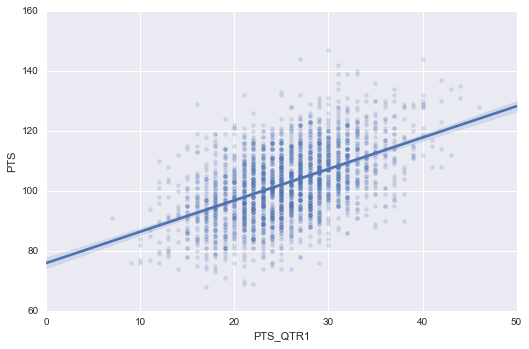

In [653]:
# Seaborn scatter plot with regression line
sns.lmplot(x='PTS_QTR1', y='PTS', data=boxscore, aspect=1.5, scatter_kws={'alpha':0.2})


In [654]:
# create X and y
feature_cols = ['PTS_QTR1']
X = boxscore[feature_cols]
y = boxscore.PTS

# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [655]:
# print the coefficients
linreg.intercept_

75.918007446401532

In [656]:
linreg.coef_

array([ 1.04780535])

In [657]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('PTS_QTR1', 1.0478053475004736)]

In [658]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

10.102030159037211

#### We have a RMSE of 10.1, which means my model is 10 points off. We did detect a relationship and we expected more factors to be involved, so let's start incorporating more features

In [659]:
percentages = pd.read_csv('percentages.csv')
percentages.head()
home_percentages = percentages[['GAME_ID','HOME_PCT']]

In [18]:
home_percentages.rename(columns={'HOME_PCT':'PERCENTAGE'},inplace=True)
away_percentages.rename(columns={'VISITOR_PCT':'PERCENTAGE'},inplace=True)

In [19]:
team_percentages = pd.concat([home_percentages,away_percentages], axis=0)


In [20]:
team_percentages.sort(columns='GAME_ID',inplace=True)

In [21]:
team = team_percentages.reset_index().drop('index', axis=1)


In [25]:
team

,GAME_ID,PERCENTAGE
0,21500001,0.58808
1,21500001,0.41192
2,21500002,0.38648
3,21500002,0.61352
4,21500003,0.58808
5,21500003,0.41192
6,21500004,0.58808
7,21500004,0.41192
8,21500005,0.61352
9,21500005,0.38648


In [26]:
boxscore = pd.concat([boxscore, team], axis=1)

In [27]:
boxscore.columns

Index([u'GAME_DATE_EST', u'GAME_SEQUENCE', u'GAME_ID', u'TEAM_ID',
       u'TEAM_ABBREVIATION', u'TEAM_CITY_NAME', u'TEAM_NICKNAME',
       u'TEAM_WINS_LOSSES', u'PTS_QTR1', u'PTS_QTR2', u'PTS_QTR3', u'PTS_QTR4',
       u'PTS_OT1', u'PTS_OT2', u'PTS_OT3', u'PTS_OT4', u'PTS', u'GAME_ID',
       u'PERCENTAGE'],
      dtype='object')

In [660]:
scores.columns

Index([u'Unnamed: 0', u'DATE', u'GAME_ID', u'HOME_TEAM_ID', u'HOME_TEAM',
       u'HOME_TEAM_W_L', u'HOME_QTR1', u'HOME_QTR2', u'HOME_QTR3',
       u'HOME_QTR4', u'HOME_OT1', u'HOME_OT2', u'HOME_OT3', u'HOME_OT4',
       u'HOME_PTS', u'AWAY_TEAM_ID', u'AWAY_TEAM', u'AWAY_TEAM_W_L',
       u'AWAY_QTR1', u'AWAY_QTR2', u'AWAY_QTR3', u'AWAY_QTR4', u'AWAY_OT1',
       u'AWAY_OT2', u'AWAY_OT3', u'AWAY_OT4', u'AWAY_PTS', u'MOV', u'QTR1_MOV',
       u'QTR2_MOV', u'QTR3_MOV', u'AWAY_HALFTIME', u'HOME_HALFTIME',
       u'HALFTIME_MOV'],
      dtype='object')

In [661]:
scores.head()

,Unnamed: 0,DATE,GAME_ID,HOME_TEAM_ID,HOME_TEAM,HOME_TEAM_W_L,HOME_QTR1,HOME_QTR2,HOME_QTR3,HOME_QTR4,...,AWAY_OT3,AWAY_OT4,AWAY_PTS,MOV,QTR1_MOV,QTR2_MOV,QTR3_MOV,AWAY_HALFTIME,HOME_HALFTIME,HALFTIME_MOV
0,0,2015-10-27,21500001,1610612737,ATL,0-1,25,18,23,28,...,0,0,106,-12,0,-5,-11,48,43,-5
1,1,2015-10-27,21500002,1610612741,CHI,1-0,26,20,25,26,...,0,0,95,2,9,-3,-3,40,46,6
2,2,2015-10-27,21500003,1610612744,GSW,1-0,39,20,35,17,...,0,0,95,16,4,6,9,49,59,10
3,3,2015-10-28,21500004,1610612753,ORL,0-1,29,22,16,20,...,0,0,88,-1,-2,0,4,53,51,-2
4,4,2015-10-28,21500005,1610612738,BOS,1-0,21,30,28,33,...,0,0,95,17,-5,16,1,40,51,11


### Read Halftime Scores

In [410]:
halftime = pd.read_csv('halftime.csv')

In [414]:
halftime.drop('Unnamed: 0',axis=1, inplace=True)
halftime.head()

,GAME_ID,HALFTIME_HOME_FG,HALFTIME_HOME_FG_MISSES,HALFTIME_HOME_FG_PCT,HALFTIME_HOME_REBOUNDS,HALFTIME_VISITING_FG,HALFTIME_VISITING_FG_PCT,HALFTIME_VISITING_MISSES,HALFTIME_VISITING_REBOUNDS
0,21500001,19,24,0.441860,22,19,0.441860,24,24
1,21500002,35,50,0.411765,47,37,0.397849,56,50
2,21500003,40,55,0.421053,56,33,0.407407,48,33
3,21500004,36,63,0.363636,56,33,0.392857,51,49
4,21500005,39,46,0.458824,41,34,0.409639,49,46


In [669]:
scores = pd.merge(scores, halftime, on='GAME_ID')

In [668]:
quarter_1 = pd.read_csv('quarter.csv')
quarter_1.drop('Unnamed: 0',axis=1, inplace=True)

In [670]:
scores = pd.merge(scores, quarter_1,on='GAME_ID' )

In [673]:
scores.drop('Unnamed: 0',inplace=True, axis=1)

In [674]:
scores.dtypes

DATE                          datetime64[ns]
GAME_ID                                int64
HOME_TEAM_ID                           int64
HOME_TEAM                             object
HOME_TEAM_W_L                         object
HOME_QTR1                              int64
HOME_QTR2                              int64
HOME_QTR3                              int64
HOME_QTR4                              int64
HOME_OT1                               int64
HOME_OT2                               int64
HOME_OT3                               int64
HOME_OT4                               int64
HOME_PTS                               int64
AWAY_TEAM_ID                           int64
AWAY_TEAM                             object
AWAY_TEAM_W_L                         object
AWAY_QTR1                              int64
AWAY_QTR2                              int64
AWAY_QTR3                              int64
AWAY_QTR4                              int64
AWAY_OT1                               int64
AWAY_OT2  

In [679]:
scores['HALFTIME_FG_DIFF'] = scores['HALFTIME_HOME_FG_PCT']-scores['HALFTIME_VISITING_FG_PCT']

In [680]:
scores['HALFTIME_REBOUNDS_DIFF'] = scores['HALFTIME_HOME_REBOUNDS']-scores['HALFTIME_VISITING_REBOUNDS']

In [684]:
scores['QTR_FG_DIFF'] = scores['QTR_HOME_FG_PCT']-scores['QTR_VISITING_FG_PCT']

In [685]:
scores['QTR_REBOUNDS_DIFF'] = scores['QTR_HOME_REBOUNDS']-scores['QTR_VISITING_REBOUNDS']

In [676]:
scores.columns

Index([u'DATE', u'GAME_ID', u'HOME_TEAM_ID', u'HOME_TEAM', u'HOME_TEAM_W_L',
       u'HOME_QTR1', u'HOME_QTR2', u'HOME_QTR3', u'HOME_QTR4', u'HOME_OT1',
       u'HOME_OT2', u'HOME_OT3', u'HOME_OT4', u'HOME_PTS', u'AWAY_TEAM_ID',
       u'AWAY_TEAM', u'AWAY_TEAM_W_L', u'AWAY_QTR1', u'AWAY_QTR2',
       u'AWAY_QTR3', u'AWAY_QTR4', u'AWAY_OT1', u'AWAY_OT2', u'AWAY_OT3',
       u'AWAY_OT4', u'AWAY_PTS', u'MOV', u'QTR1_MOV', u'QTR2_MOV', u'QTR3_MOV',
       u'AWAY_HALFTIME', u'HOME_HALFTIME', u'HALFTIME_MOV',
       u'HALFTIME_HOME_FG', u'HALFTIME_HOME_FG_MISSES',
       u'HALFTIME_HOME_FG_PCT', u'HALFTIME_HOME_REBOUNDS',
       u'HALFTIME_VISITING_FG', u'HALFTIME_VISITING_FG_PCT',
       u'HALFTIME_VISITING_MISSES', u'HALFTIME_VISITING_REBOUNDS',
       u'QTR_HOME_FG', u'QTR_HOME_FG_MISSES', u'QTR_HOME_FG_PCT',
       u'QTR_HOME_REBOUNDS', u'QTR_VISITING_FG', u'QTR_VISITING_FG_PCT',
       u'QTR_VISITING_MISSES', u'QTR_VISITING_REBOUNDS', u'QTR_REBOUNDS_DIFF'],
      dtype='object')

### Base Rate

In [728]:
scores.MOV.mean(), scores.MOV.std()

(2.6747967479674797, 13.339038880597256)

(array([   1.,    7.,   42.,  144.,  312.,  354.,  255.,   89.,   20.,    6.]),
 array([-51. , -40.9, -30.8, -20.7, -10.6,  -0.5,   9.6,  19.7,  29.8,
         39.9,  50. ]),
 <a list of 10 Patch objects>)

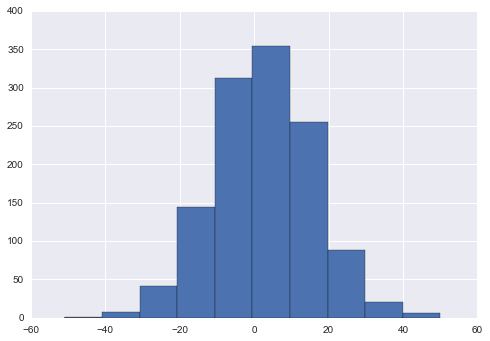

In [731]:
plt.hist(scores.MOV)

In [677]:
import statsmodels.formula.api as sm
y=scores.MOV
X = scores[['HALFTIME_MOV']]
sm.OLS(y, X,data=scores).fit(use_t=True)
# ols = sm.ols(formula='PTS ~ PTS_QTR1', data=boxscore).fit(use_t=True)
# ols = sm.ols(formula='MOV ~  HOME_QTR1, HOME_QTR2' , data=scores).fit(use_t=True)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MOV   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     148.7
Date:                Fri, 21 Oct 2016   Prob (F-statistic):           2.33e-32
Time:                        12:44:29   Log-Likelihood:                -4861.1
No. Observations:                1230   AIC:                             9726.
Df Residuals:                    1228   BIC:                             9736.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.1495      1.665    -10.299      0.000     -20.413     -13.886
HOME_QTR1      0.7642      0.063     12.192      0.000       0.641       0.887
==============================================================================
Omnibus:                        1.083   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.984
Skew:                           0.003   Prob(JB):                        0.611
Kurtosis:                       3.138   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Make a table

### 2nd quarter appears to be far less predictive than other quarters

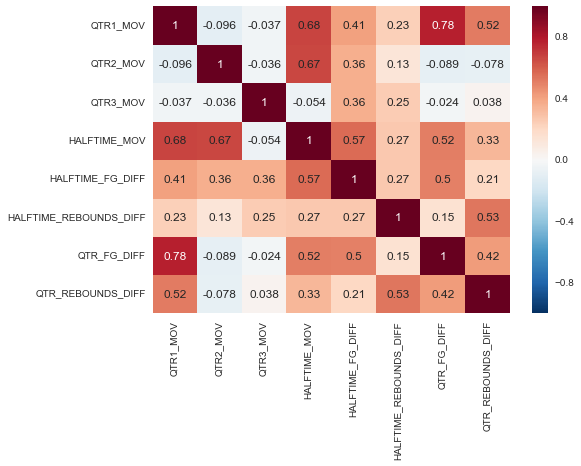

In [687]:
sns.heatmap(scores[['QTR1_MOV','QTR2_MOV','QTR3_MOV','HALFTIME_MOV','HALFTIME_FG_DIFF', 'HALFTIME_REBOUNDS_DIFF','QTR_FG_DIFF','QTR_REBOUNDS_DIFF']].corr(),annot=True)


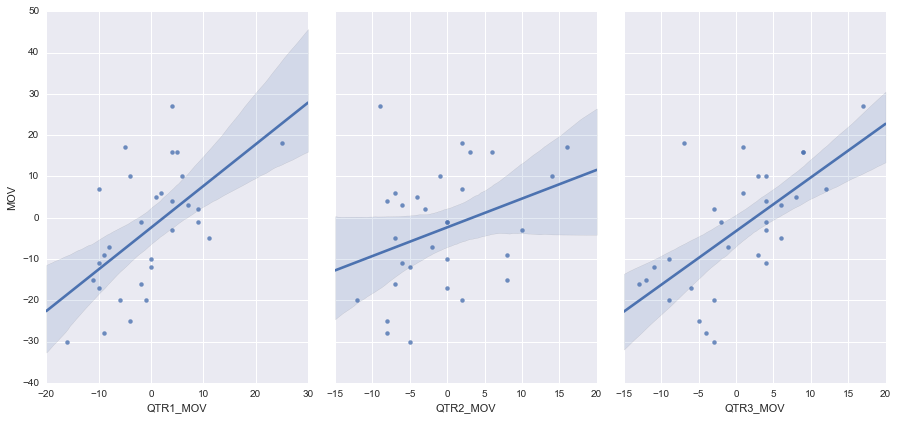

In [590]:
# multiple scatter plots
sns.pairplot(scores, x_vars=['QTR1_MOV','QTR2_MOV','QTR3_MOV'], y_vars='MOV', size=6, aspect=0.7, kind='reg')

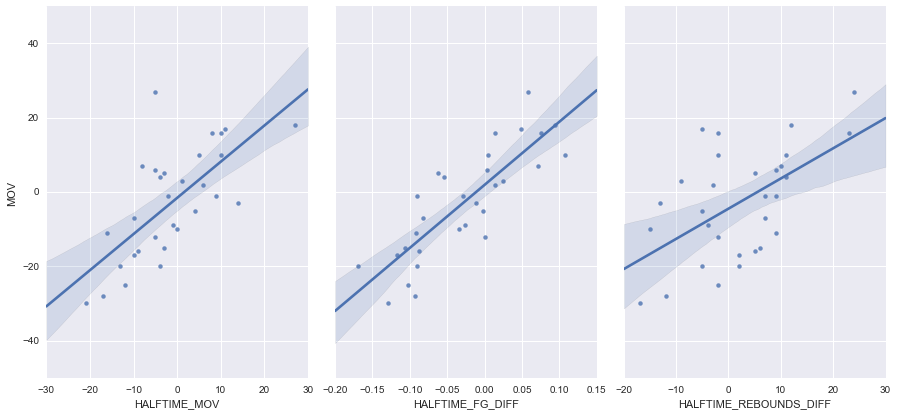

In [591]:
sns.pairplot(scores, x_vars=['HALFTIME_MOV','HALFTIME_FG_DIFF', 'HALFTIME_REBOUNDS_DIFF'], y_vars='MOV', size=6, aspect=0.7, kind='reg')

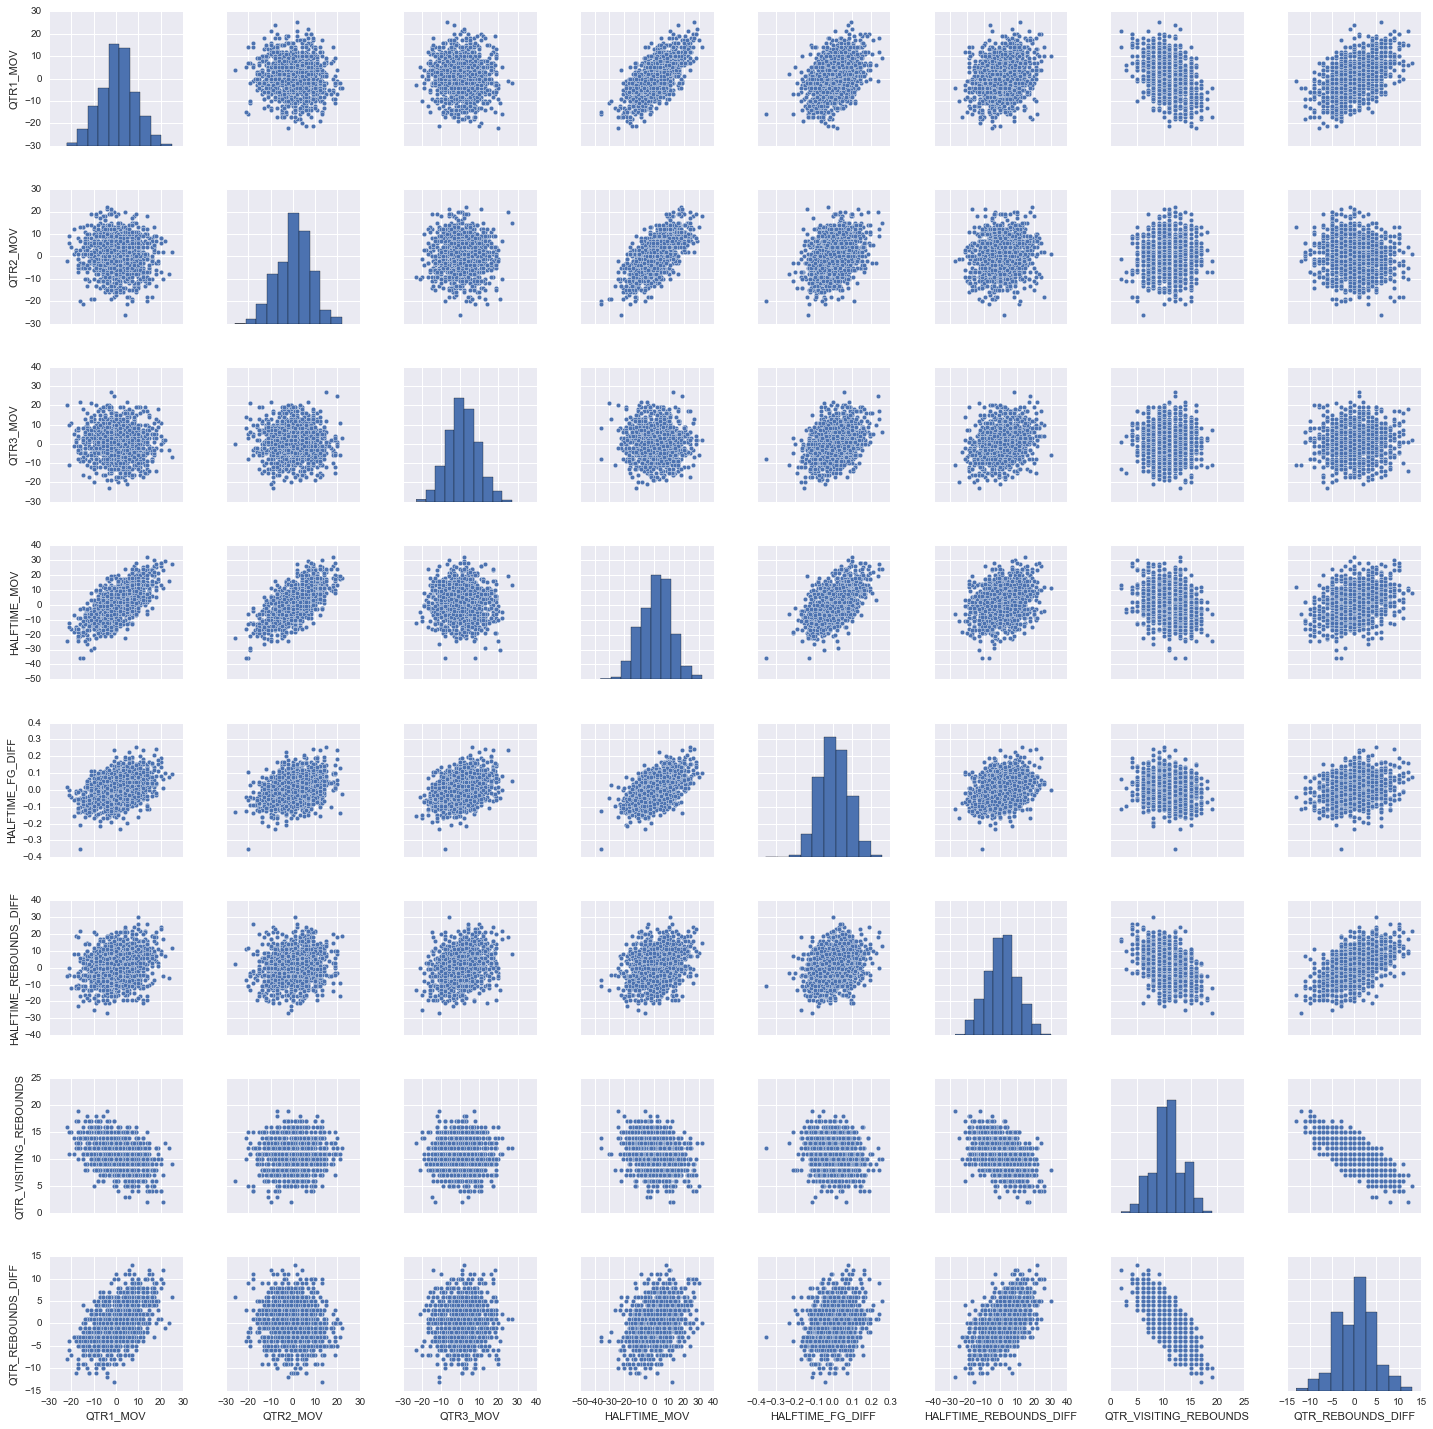

In [733]:
sns.pairplot(data=scores[['QTR1_MOV',                               
'QTR2_MOV',                               
'QTR3_MOV',                               
'HALFTIME_MOV',                           
'HALFTIME_FG_DIFF',                     
'HALFTIME_REBOUNDS_DIFF',                 
'QTR_VISITING_REBOUNDS',                  
'QTR_REBOUNDS_DIFF']])
#              hue="Survived", dropna=True)

In [709]:
features = ['HALFTIME_MOV']
train_test_rmse(features)

(9.9109252221554076, 0.4457250484180435, array([ 8.7854786]))

In [711]:
features = ['HALFTIME_MOV','HALFTIME_REBOUNDS_DIFF']
train_test_rmse(features)

(9.3038036647000695, 0.51155245855962395, array([ 7.71456601,  3.74411567]))

In [710]:
features = ['HALFTIME_REBOUNDS_DIFF']
train_test_rmse(features)

(12.155535631613963, 0.16623232172000338, array([ 5.87054544]))

In [712]:
features = ['HALFTIME_FG_DIFF']
train_test_rmse(features)


(8.4241438296177513, 0.59954990573979194, array([ 10.4679396]))

In [713]:
features = ['HALFTIME_FG_DIFF','HALFTIME_MOV']
train_test_rmse(features)


(7.6260769329907285, 0.6718297421668542, array([ 7.94104608,  4.37510602]))

In [735]:
features = ['HALFTIME_FG_DIFF','HALFTIME_MOV','HALFTIME_REBOUNDS_DIFF']
train_test_rmse(features)

(7.3099886275971322,
 0.69847018828955432,
 array([ 7.48872654,  3.77884049,  2.96294903]))

In [707]:
features = ['HALFTIME_REBOUNDS_DIFF']
# feature_cols = [[''HALFTIME_MOV']]
scores.columns

Index([u'DATE', u'GAME_ID', u'HOME_TEAM_ID', u'HOME_TEAM', u'HOME_TEAM_W_L',
       u'HOME_QTR1', u'HOME_QTR2', u'HOME_QTR3', u'HOME_QTR4', u'HOME_OT1',
       u'HOME_OT2', u'HOME_OT3', u'HOME_OT4', u'HOME_PTS', u'AWAY_TEAM_ID',
       u'AWAY_TEAM', u'AWAY_TEAM_W_L', u'AWAY_QTR1', u'AWAY_QTR2',
       u'AWAY_QTR3', u'AWAY_QTR4', u'AWAY_OT1', u'AWAY_OT2', u'AWAY_OT3',
       u'AWAY_OT4', u'AWAY_PTS', u'MOV', u'QTR1_MOV', u'QTR2_MOV', u'QTR3_MOV',
       u'AWAY_HALFTIME', u'HOME_HALFTIME', u'HALFTIME_MOV',
       u'HALFTIME_HOME_FG', u'HALFTIME_HOME_FG_MISSES',
       u'HALFTIME_HOME_FG_PCT', u'HALFTIME_HOME_REBOUNDS',
       u'HALFTIME_VISITING_FG', u'HALFTIME_VISITING_FG_PCT',
       u'HALFTIME_VISITING_MISSES', u'HALFTIME_VISITING_REBOUNDS',
       u'QTR_HOME_FG', u'QTR_HOME_FG_MISSES', u'QTR_HOME_FG_PCT',
       u'QTR_HOME_REBOUNDS', u'QTR_VISITING_FG', u'QTR_VISITING_FG_PCT',
       u'QTR_VISITING_MISSES', u'QTR_VISITING_REBOUNDS', u'QTR_REBOUNDS_DIFF',
       u'HALFTIME_FG_DIFF', u

In [714]:
features = ['QTR3_MOV','HALFTIME_MOV']
train_test_rmse(features)

(7.6286055517275955, 0.6716120797845786, array([ 6.78291113,  9.13605798]))

In [715]:
features = ['QTR3_MOV']
train_test_rmse(features)

(12.011423433671263, 0.18588490305164584, array([ 6.31433251]))

In [547]:
lr = LinearRegression()
X = scores[['HALFTIME_FG_DIFF']]
y = scores.MOV
scoring = cross_val_score(lr, X, y, cv=5, scoring='mean_squared_error')

In [483]:
np.sqrt(-scoring.mean())

8.4580376557957884

### Margin of Victory is Home Team wins 2.67 points per game

In [472]:
scores.MOV.mean()

2.6747967479674797

In [484]:
scores.MOV.describe()

count    1230.000000
mean        2.674797
std        13.339039
min       -51.000000
25%        -6.000000
50%         4.000000
75%        12.000000
max        50.000000
Name: MOV, dtype: float64

In [452]:
scores.columns

Index([u'DATE', u'GAME_ID', u'HOME_TEAM_ID', u'HOME_TEAM', u'HOME_TEAM_W_L',
       u'HOME_QTR1', u'HOME_QTR2', u'HOME_QTR3', u'HOME_QTR4', u'HOME_OT1',
       u'HOME_OT2', u'HOME_OT3', u'HOME_OT4', u'HOME_PTS', u'AWAY_TEAM_ID',
       u'AWAY_TEAM', u'AWAY_TEAM_W_L', u'AWAY_QTR1', u'AWAY_QTR2',
       u'AWAY_QTR3', u'AWAY_QTR4', u'AWAY_OT1', u'AWAY_OT2', u'AWAY_OT3',
       u'AWAY_OT4', u'AWAY_PTS', u'MOV', u'QTR1_MOV', u'QTR2_MOV', u'QTR3_MOV',
       u'HOME_HALFTIME', u'AWAY_HALFTIME', u'HALFTIME_MOV',
       u'HALFTIME_HOME_FG', u'HALFTIME_HOME_FG_MISSES',
       u'HALFTIME_HOME_FG_PCT', u'HALFTIME_HOME_REBOUNDS',
       u'HALFTIME_VISITING_FG', u'HALFTIME_VISITING_FG_PCT',
       u'HALFTIME_VISITING_MISSES', u'HALFTIME_VISITING_REBOUNDS',
       u'HALFTIME_FG_DIFF', u'HALFTIME_REBOUNDS_DIFF'],
      dtype='object')

# Random Forest Regressor

In [693]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg
from sklearn.cross_validation import cross_val_score

In [694]:
scores.columns

Index([u'DATE', u'GAME_ID', u'HOME_TEAM_ID', u'HOME_TEAM', u'HOME_TEAM_W_L',
       u'HOME_QTR1', u'HOME_QTR2', u'HOME_QTR3', u'HOME_QTR4', u'HOME_OT1',
       u'HOME_OT2', u'HOME_OT3', u'HOME_OT4', u'HOME_PTS', u'AWAY_TEAM_ID',
       u'AWAY_TEAM', u'AWAY_TEAM_W_L', u'AWAY_QTR1', u'AWAY_QTR2',
       u'AWAY_QTR3', u'AWAY_QTR4', u'AWAY_OT1', u'AWAY_OT2', u'AWAY_OT3',
       u'AWAY_OT4', u'AWAY_PTS', u'MOV', u'QTR1_MOV', u'QTR2_MOV', u'QTR3_MOV',
       u'AWAY_HALFTIME', u'HOME_HALFTIME', u'HALFTIME_MOV',
       u'HALFTIME_HOME_FG', u'HALFTIME_HOME_FG_MISSES',
       u'HALFTIME_HOME_FG_PCT', u'HALFTIME_HOME_REBOUNDS',
       u'HALFTIME_VISITING_FG', u'HALFTIME_VISITING_FG_PCT',
       u'HALFTIME_VISITING_MISSES', u'HALFTIME_VISITING_REBOUNDS',
       u'QTR_HOME_FG', u'QTR_HOME_FG_MISSES', u'QTR_HOME_FG_PCT',
       u'QTR_HOME_REBOUNDS', u'QTR_VISITING_FG', u'QTR_VISITING_FG_PCT',
       u'QTR_VISITING_MISSES', u'QTR_VISITING_REBOUNDS', u'QTR_REBOUNDS_DIFF',
       u'HALFTIME_FG_DIFF', u

In [692]:
X = scores[['QTR1_MOV',                               
'QTR2_MOV',                               
'QTR3_MOV',                               
'HALFTIME_MOV',                           
'HALFTIME_FG_DIFF',                     
'HALFTIME_REBOUNDS_DIFF',                 
'QTR_VISITING_REBOUNDS',                  
'QTR_REBOUNDS_DIFF']]
y=scores['MOV']
     

In [696]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [697]:

# list of values to try for max_depth
RMSE_scores

[7.0778494124971703,
 6.9405464212078058,
 6.8438692528175009,
 6.8150225395415251,
 6.8132929884280768,
 6.7717544685155229,
 6.7623161860516827,
 6.7525216238300603,
 6.7495787655978052,
 6.7411880075726547,
 6.7396076242042753,
 6.7388668098847475,
 6.7329437434104928,
 6.7376041868131509,
 6.7291026931613462,
 6.7239300485807876,
 6.7283559352136404,
 6.7303270224163629,
 6.7256484885952172,
 6.7200486245784363,
 6.7122560246368135,
 6.7080908616837505,
 6.7091884692531796,
 6.7068392079426689,
 6.7042776362080572,
 6.7044372982831204,
 6.7045934544172052,
 6.7055470424446328,
 6.7076995441276495,
 6.7064773539903388]

In [698]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(6.7200486245784363, 20)

In [701]:
# max_depth=20 was best, so fit a tree using that parameter
treereg = RandomForestRegressor(max_depth=20, random_state=1)
treereg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [702]:
treereg.feature_importances_
# compute feature importances
pd.DataFrame({'feature':X.columns, 'importance':treereg.feature_importances_}).sort('importance', ascending=False)

,feature,importance
4,HALFTIME_FG_DIFF,0.613364
3,HALFTIME_MOV,0.134891
2,QTR3_MOV,0.098798
5,HALFTIME_REBOUNDS_DIFF,0.061971
1,QTR2_MOV,0.026600
0,QTR1_MOV,0.025491
7,QTR_REBOUNDS_DIFF,0.019911
6,QTR_VISITING_REBOUNDS,0.018975


In [703]:
X = scores[['HALFTIME_FG_DIFF',                               
'HALFTIME_MOV']]
y=scores['MOV']

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
     

In [705]:
# list of values to try for max_depth
RMSE_scores

[8.916563988770978,
 8.8215535627910011,
 8.7497980268260704,
 8.7078426614444648,
 8.6737146237196292,
 8.6319316639542141,
 8.6205157193356445,
 8.6152758461351073,
 8.6075133133255921,
 8.6047485122452656,
 8.6056263673382301,
 8.6020456312567131,
 8.6095356375343819,
 8.6016091824947196,
 8.6018971488556986,
 8.5921355795597414,
 8.5906513215737572,
 8.5932420222451729,
 8.5941183297378814,
 8.595760010045586,
 8.5979055355016172,
 8.5977939336078322,
 8.5951290081564515,
 8.5977100216546027,
 8.5986626149705803,
 8.5981252100516858,
 8.5994764467550713,
 8.6033984378190187,
 8.6025393956789635,
 8.6044239387524115]

In [734]:
X = scores[['HALFTIME_FG_DIFF',                               
'HALFTIME_MOV','HALFTIME_REBOUNDS_DIFF']]
y=scores['MOV']

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
     

In [736]:
# list of values to try for max_depth
RMSE_scores

[8.0754929000908042,
 7.8793198357930621,
 7.7795017370058277,
 7.756785456322274,
 7.762675569134279,
 7.739662017347638,
 7.7283173936960834,
 7.7282496855329352,
 7.7281582087983312,
 7.735755847156736,
 7.7377692599864094,
 7.7375248482205139,
 7.7444926904340887,
 7.7451272133315756,
 7.739583415342965,
 7.7379533164941305,
 7.7419738224965382,
 7.7434588324594911,
 7.7376675862084925,
 7.7391367389183499,
 7.7386699181916088,
 7.7350180773545514,
 7.7302838430428649,
 7.7294933685748166,
 7.7283152713560668,
 7.7225613293578563,
 7.7245479831853077,
 7.723803038384796,
 7.7261061011457857,
 7.7244065692747341]

In [718]:
X = scores[['QTR1_MOV',                               
'QTR2_MOV',                               
'QTR3_MOV',                               
'HALFTIME_MOV',                           
'HALFTIME_FG_DIFF',                     
'HALFTIME_REBOUNDS_DIFF',                 
'QTR_VISITING_REBOUNDS',                  
'QTR_REBOUNDS_DIFF',
'HOME_QTR1', 'HOME_QTR2', 'HOME_QTR3',
'AWAY_QTR1', 'AWAY_QTR2','AWAY_QTR3',
'HOME_HALFTIME', 'AWAY_HALFTIME','HALFTIME_HOME_FG', 'HALFTIME_HOME_FG_MISSES',
'HALFTIME_HOME_REBOUNDS','HALFTIME_VISITING_FG', 'HALFTIME_VISITING_MISSES', 
'HALFTIME_VISITING_REBOUNDS','QTR_HOME_FG', 'QTR_HOME_FG_MISSES', 'QTR_HOME_REBOUNDS', 
'QTR_VISITING_FG', 'QTR_VISITING_MISSES', 'QTR_VISITING_REBOUNDS']]
y=scores['MOV']

In [719]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [720]:
# list of values to try for max_depth
RMSE_scores

[6.9636954732780669,
 6.8189485881772214,
 6.7048512081611236,
 6.6592303048867922,
 6.6504905896073678,
 6.6220143697356537,
 6.630992240594928,
 6.6196264870782189,
 6.6071059709955122,
 6.6076532784547606,
 6.5970938768799172,
 6.5954643212419182,
 6.5972201837477584,
 6.5955568066920875,
 6.5966968466357017,
 6.5968015156946063,
 6.6006476053575112,
 6.6009950963995454,
 6.6026586556506315,
 6.591735972754539,
 6.5920802946998736,
 6.5902678704070423,
 6.5906747984187035,
 6.5828040446156706,
 6.5797038137939676,
 6.5767465890910985,
 6.5750348268089365,
 6.5786978242981462,
 6.5823490661312345,
 6.5839300083563446]

In [721]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(6.591735972754539, 20)

In [722]:
# max_depth=20 was best, so fit a tree using that parameter
treereg = RandomForestRegressor(max_depth=20, random_state=1)
treereg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [723]:
treereg.feature_importances_
# compute feature importances
pd.DataFrame({'feature':X.columns, 'importance':treereg.feature_importances_}).sort('importance', ascending=False)

,feature,importance
4,HALFTIME_FG_DIFF,0.585909
3,HALFTIME_MOV,0.113805
2,QTR3_MOV,0.067105
5,HALFTIME_REBOUNDS_DIFF,0.036706
19,HALFTIME_VISITING_FG,0.014805
18,HALFTIME_HOME_REBOUNDS,0.013610
13,AWAY_QTR3,0.013225
10,HOME_QTR3,0.012180
16,HALFTIME_HOME_FG,0.010555
0,QTR1_MOV,0.010394


# Linear Regression

In [737]:
def train_test_rmse(feature_cols):
    X = scores[feature_cols]
    y = scores.MOV
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred)), linreg.score(X_test, y_test),linreg.coef_
 

In [738]:
features = ['HALFTIME_FG_DIFF']
train_test_rmse(features)

(8.4241438296177513, 0.59954990573979194, array([ 10.4679396]))

In [739]:
features = ['HALFTIME_MOV']
train_test_rmse(features)

(9.9109252221554076, 0.4457250484180435, array([ 8.7854786]))

In [740]:
features = ['HALFTIME_REBOUNDS_DIFF']
train_test_rmse(features)


(12.155535631613963, 0.16623232172000338, array([ 5.87054544]))

In [741]:
features = ['HALFTIME_MOV','HALFTIME_FG_DIFF']
train_test_rmse(features)

(7.6260769329907276, 0.67182974216685432, array([ 4.37510602,  7.94104608]))

In [742]:
features = ['HALFTIME_MOV','HALFTIME_FG_DIFF','HALFTIME_REBOUNDS_DIFF']
train_test_rmse(features)

(7.3099886275971322,
 0.69847018828955443,
 array([ 3.77884049,  7.48872654,  2.96294903]))

### Conclusion
A model incorporating the following 3 features

1. Halftime MOV, Halftime FG% Diff and Halftime Rebounds diff explained 70% of the variance
2. FG% Diff explained more of the variance than any other feature
3. More Features


### More Features

1. Clustering Teams into Styles
2. Factoring in Vegas Line Probabilities 
3. Factoring in Rest